Erniyaz Final Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2



Посмотрите формат таблиц

Дата — дата транзакции или операции (например, 2018-01-04).

Склад — идентификатор склада (например, 1).

Контрагент — идентификатор контрагента (например, address_0).

Номенклатура — идентификатор или название продукта (например, product_1).

Количество — количество продукта в данной транзакции (например, 4).



---



Сразу переведем столбец "Дата" в правильный формат

In [3]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')
print(df.head())

        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2




---



Сгруппируйте данные по дате, посчитайте количество продаж

In [4]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [5]:
print(grouped_df)

          Дата  Количество
0   2018-01-04        3734
1   2018-01-05        3643
2   2018-01-06        3193
3   2018-01-07        3298
4   2018-01-09        4055
..         ...         ...
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570

[205 rows x 2 columns]




---



Нарисуйте график продаж у `grouped_df`

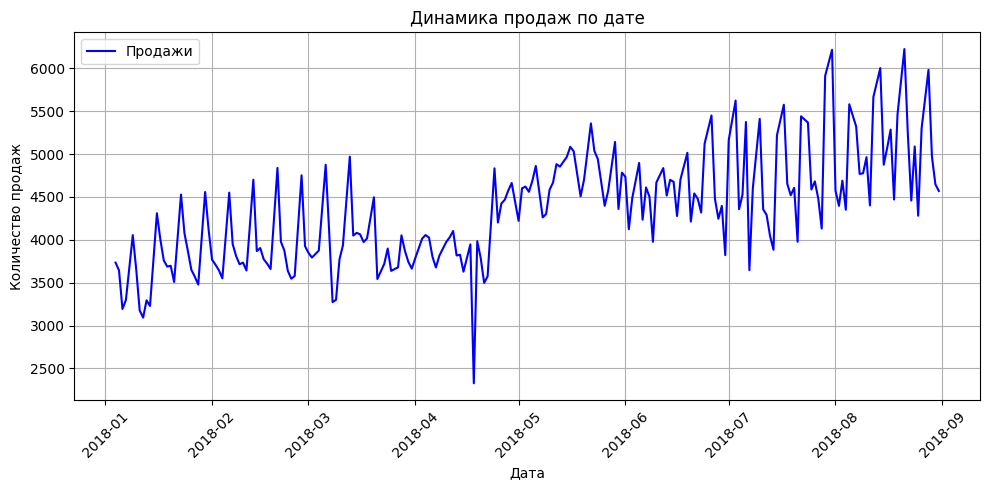

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], linestyle='-', color='b', label='Продажи')
plt.title('Динамика продаж по дате')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике я вижу рост продаж с января по август 2018 года, с регулярными колебаниями и пиками. В середине апреля наблюдается резкое падение, после которого продажи быстро восстанавливаются. Тренд показывает постепенное увеличение объема продаж, что может свидетельствовать о растущем спросе или сезонных факторах.










---



Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [7]:
from scipy import stats

df['Количество_Z'] = stats.zscore(df['Количество'])

outlier_row = df.loc[df['Количество_Z'].idxmax()]
print(outlier_row)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Количество_Z              65.723369
Name: 218822, dtype: object




---



Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [8]:
filtered_df = df[(df['Склад'] == 3) &
                 (df['Дата'].dt.month.isin([6, 7, 8])) &
                 (df['Дата'].dt.dayofweek == 2)]

top_product = filtered_df.groupby('Номенклатура')['Количество'].sum().idxmax()

print("Топовый товар по продажам по средам за июнь, июль, август у склада 3:", top_product)

Топовый товар по продажам по средам за июнь, июль, август у склада 3: product_1




---





---



Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [12]:
weather_df = pd.read_excel('Pogoda20182.xls', skiprows=6)
print(weather_df.head(10))

  Местное время в Астане     T     Po      P   Pa     U  \
0       31.08.2018 23:00   8.2  736.6  768.3  0.2  78.0   
1       31.08.2018 20:00   9.6  736.4  767.9  1.2  88.0   
2       31.08.2018 17:00  11.3  735.2  766.4  0.4  83.0   
3       31.08.2018 14:00  12.3  734.8  765.9  0.9  80.0   
4       31.08.2018 11:00  13.2  733.9  764.8  1.0  83.0   
5       31.08.2018 08:00  12.5  732.9  763.9  0.1  99.0   
6       31.08.2018 05:00  10.3  732.8  764.1 -0.8  85.0   
7       31.08.2018 02:00  10.8  733.6  764.8 -0.9  85.0   
8       30.08.2018 23:00  11.1  734.5  765.7 -0.3  82.0   
9       30.08.2018 20:00  17.1  734.8  765.3  0.3  63.0   

                                       DD  Ff  ff10  ff3  ...  \
0          Ветер, дующий с северо-востока   4   NaN  NaN  ...   
1    Ветер, дующий с западо-северо-запада   3   NaN  NaN  ...   
2  Ветер, дующий с востоко-северо-востока   4   NaN  NaN  ...   
3          Ветер, дующий с северо-востока   4   NaN  NaN  ...   
4   Ветер, дующий с север



---



Разделение столбца "Местное время в Астане" на дату и время

In [14]:
weather_df[['Дата', 'Время']] = weather_df['Местное время в Астане'].astype(str).str.extract(r'(\d{2}\.\d{2}\.\d{4})\s+(\d{2}:\d{2})')

print(weather_df[['Дата', 'Время']].head(10))

         Дата  Время
0  31.08.2018  23:00
1  31.08.2018  20:00
2  31.08.2018  17:00
3  31.08.2018  14:00
4  31.08.2018  11:00
5  31.08.2018  08:00
6  31.08.2018  05:00
7  31.08.2018  02:00
8  30.08.2018  23:00
9  30.08.2018  20:00


Преобразование столбца "T" в числовой формат

In [15]:
weather_df['T'] = pd.to_numeric(weather_df['T'], errors='coerce')

print(weather_df['T'].head(10))

0     8.2
1     9.6
2    11.3
3    12.3
4    13.2
5    12.5
6    10.3
7    10.8
8    11.1
9    17.1
Name: T, dtype: float64




---



Вычисление средней температуры за день

In [20]:
weather_daily = weather_df.groupby('Дата')['T'].mean().reset_index()
weather_daily.columns = ['Дата', 'Средняя температура']

print(weather_daily.head(8))

         Дата  Средняя температура
0  01.01.2018              -9.4625
1  01.02.2018             -16.9000
2  01.03.2018             -17.7625
3  01.04.2018              -7.6875
4  01.05.2018               7.8250
5  01.06.2018              19.9750
6  01.07.2018              20.6500
7  01.08.2018              16.1250




---



Объединение данных о продажах и погоде

In [24]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], dayfirst=True)
weather_daily['Дата'] = pd.to_datetime(weather_daily['Дата'], dayfirst=True)

combined_df = pd.merge(grouped_df, weather_daily, on='Дата', how='inner')
print(combined_df.head(10))

        Дата  Количество  Средняя температура
0 2018-01-04        3734             -14.0750
1 2018-01-05        3643             -16.8625
2 2018-01-06        3193             -13.3000
3 2018-01-07        3298             -12.7500
4 2018-01-09        4055              -6.2500
5 2018-01-10        3653              -1.4875
6 2018-01-11        3176              -9.4750
7 2018-01-12        3092             -14.9750
8 2018-01-13        3294             -23.9625
9 2018-01-14        3228             -24.9500




---



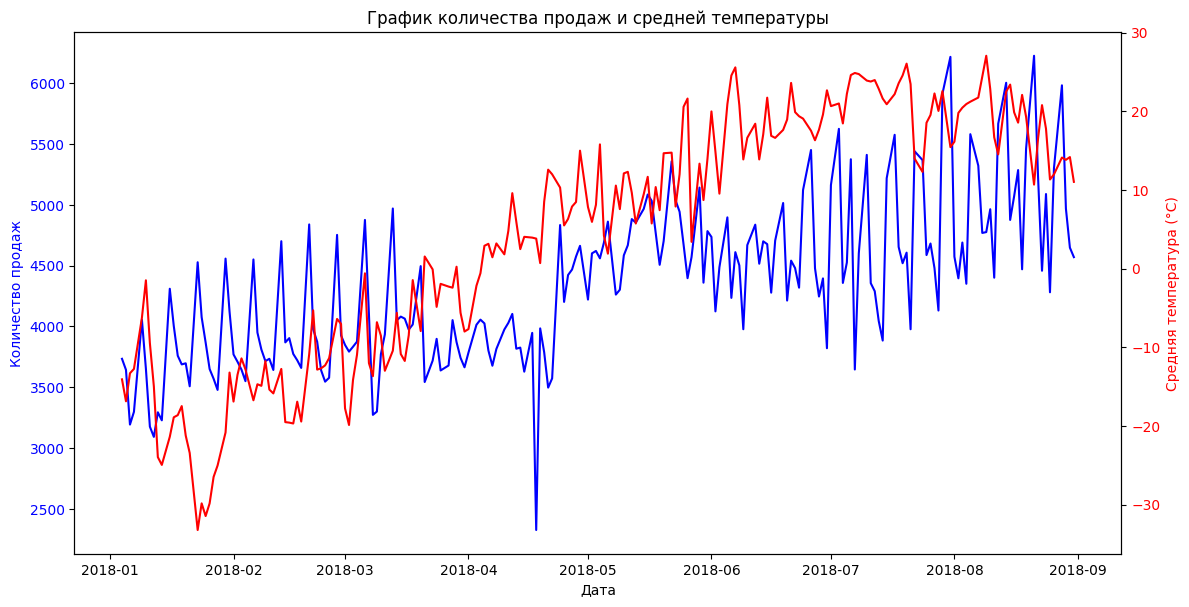

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(combined_df['Дата'], combined_df['Количество'], color='b', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(combined_df['Дата'], combined_df['Средняя температура'], color='r', label='Средняя температура')
ax2.set_ylabel('Средняя температура (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('График количества продаж и средней температуры')
plt.show()